In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/ahmedmajid/Desktop/Digital-Twin-for Smart-Energy-Meters/digital-twin-mvp/data/processed_telemetry.csv")
df.head()

,timestamp,temperature,vibration,pressure,anomaly_overheat,anomaly_vibration,anomaly_pressure_low,anomaly_pressure_high,anomaly,temp_roll_mean,temp_roll_std,vib_roll_mean,vib_roll_std,pres_roll_mean,pres_roll_std
0,2025-12-04 14:45:02.243591,40.20,0.80,101.20,False,False,False,False,0,57.348,12.57367,0.696,0.396396,96.012,3.947438
1,2025-12-04 14:45:55.603153,61.51,1.27,94.35,False,False,True,False,1,57.348,12.57367,0.696,0.396396,96.012,3.947438
2,2025-12-04 14:45:57.628967,74.76,0.32,90.91,True,False,True,False,1,57.348,12.57367,0.696,0.396396,96.012,3.947438
3,2025-12-04 14:45:59.638021,57.14,0.32,98.44,False,False,False,False,0,57.348,12.57367,0.696,0.396396,96.012,3.947438
4,2025-12-04 14:46:01.648827,53.13,0.77,95.16,False,False,False,False,0,57.348,12.57367,0.696,0.396396,96.012,3.947438


In [37]:
features = [
    "temperature",
    "vibration",
    "pressure",
    "temp_roll_mean",
    "temp_roll_std",
    "vib_roll_mean",
    "vib_roll_std",
    "pres_roll_mean",
    "pres_roll_std"
]

X = df[features]
X.head()

,temperature,vibration,pressure,temp_roll_mean,temp_roll_std,vib_roll_mean,vib_roll_std,pres_roll_mean,pres_roll_std
0,40.20,0.80,101.20,57.348,12.57367,0.696,0.396396,96.012,3.947438
1,61.51,1.27,94.35,57.348,12.57367,0.696,0.396396,96.012,3.947438
2,74.76,0.32,90.91,57.348,12.57367,0.696,0.396396,96.012,3.947438
3,57.14,0.32,98.44,57.348,12.57367,0.696,0.396396,96.012,3.947438
4,53.13,0.77,95.16,57.348,12.57367,0.696,0.396396,96.012,3.947438


In [45]:
model = IsolationForest(
    n_estimators=200,
    contamination=0.05,   # expected anomaly percentage
    random_state=42
)

model.fit(X)

,n_estimators,200
,max_samples,'auto'
,contamination,0.05
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [52]:
df['iforest_pred'] = model.predict(X)
df['iforest_anomaly'] = df['iforest_pred'].apply(lambda x: 1 if x == -1 else 0)

df[['timestamp', 'temperature', 'vibration', 'pressure', 'iforest_anomaly']].head()

,timestamp,temperature,vibration,pressure,iforest_anomaly
0,2025-12-04 14:45:02.243591,40.20,0.80,101.20,0
1,2025-12-04 14:45:55.603153,61.51,1.27,94.35,0
2,2025-12-04 14:45:57.628967,74.76,0.32,90.91,0
3,2025-12-04 14:45:59.638021,57.14,0.32,98.44,0
4,2025-12-04 14:46:01.648827,53.13,0.77,95.16,0


In [58]:
df[['anomaly', 'iforest_anomaly']].head()

,anomaly,iforest_anomaly
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0


In [59]:
(df['anomaly'] == df['iforest_anomaly']).mean()

np.float64(0.3793103448275862)

In [60]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

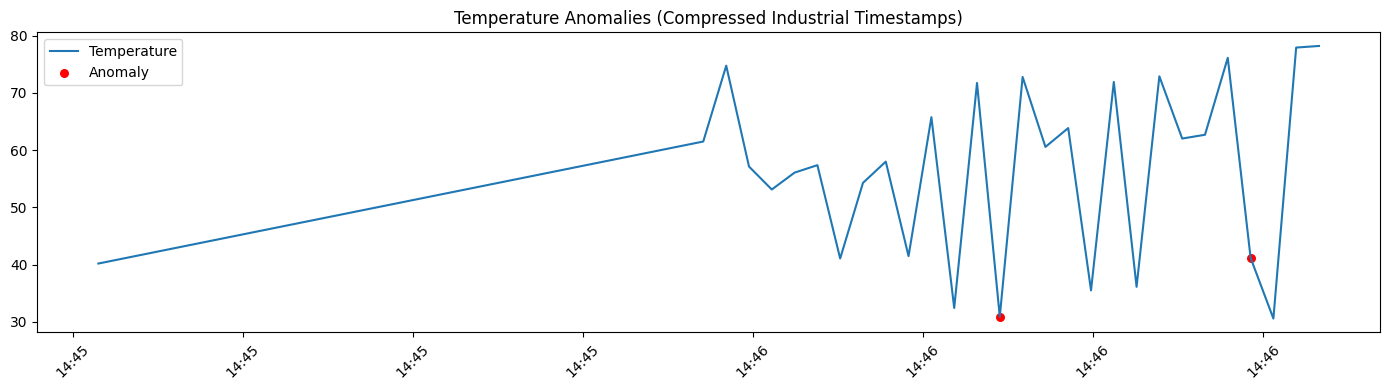

In [63]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,4))

# Plot clean data
ax.plot(df['timestamp'], df['temperature'], label='Temperature')

# Plot anomaly dots
ax.scatter(
    df[df['iforest_anomaly']==1]['timestamp'],
    df[df['iforest_anomaly']==1]['temperature'],
    color='red',
    label='Anomaly',
    s=30
)

# Use compressed industrial-style timestamps
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xticks(rotation=45)
plt.title("Temperature Anomalies (Compressed Industrial Timestamps)")
plt.legend()
plt.tight_layout()
plt.show()

In [65]:
import joblib
joblib.dump(model, "isolation_forest_model.pkl")

['isolation_forest_model.pkl']